In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from utils import testPolicy, learnModel, plot

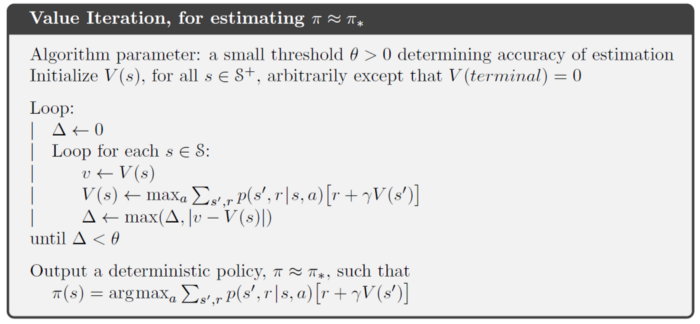

In [2]:
def valueItr(trans_prob, reward, win_state=15, env_str="FrozenLake-v1", gamma=0.99, max_itr=100):
    """
    Value iteration

    : param trans_prob: ndarray, transition probabilities p(s'|a, s)
    : param reward: ndarray, reward function r(s, a, s')
    : param gamma: float, discount factor
    : param max_itr: int, maximum number of iteration
    : return:
        policy: updated policy
        success_rate: list, success rate for each iteration
    """
    success_rate = []
    num_state = trans_prob.shape[0]
    num_action = trans_prob.shape[1]

    # init policy and value function
    policy = np.zeros(num_state, dtype=int)
    value = np.zeros(num_state)

    for counter in range(max_itr):

        # value update
        for s in range(num_state):
            val = 0
            for a in range(num_action):
                tmp = 0
                for s_new in range(num_state):
                    tmp += trans_prob[s][a][s_new] * (
                            reward[s][a][s_new] + gamma * value[s_new]
                    )
                val = max(val, tmp)
            value[s] = val

        # policy recovery
        for s in range(num_state):
            val = 0
            for a in range(num_action):
                tmp = 0
                for s_new in range(num_state):
                    tmp += trans_prob[s][a][s_new] * (
                            reward[s][a][s_new] + gamma * value[s_new]
                    )
                if tmp > val:
                    policy[s] = a
                    val = tmp

        # test the policy for each iteration
        success_rate.append(testPolicy(policy, env_str, win_state, trials=max_itr))
    return policy, success_rate

In [14]:
def findBestIterations(maxiter=300, miniter=50, step=50):
    policys = []
    success_rates = []
    for iteration in range(miniter,maxiter,step):
        VI_policy, VI_success_rate = trainModel("FrozenLake-v1", 15, iteration)
        print("Final success rate of VI: {:.1f}%".format(VI_success_rate[-1] * 100))
        policys.append(VI_policy)
        success_rates.append(VI_success_rate)
    return policys, success_rates

In [15]:
def trainModel(env_str, win_state, max_iter):
    env = gym.make(env_str)
    env.reset()
    # get transitional probability and reward function
    trans_prob, reward = learnModel(env)
    return valueItr(trans_prob, reward, win_state=15, env_str=env_str, max_itr=max_iter)

In [16]:
policys, success_rates = findBestIterations(maxiter=400, miniter=50, step=50)

Final success rate of VI: 74.0%
Final success rate of VI: 73.0%
Final success rate of VI: 70.0%
Final success rate of VI: 72.5%
Final success rate of VI: 67.2%
Final success rate of VI: 70.7%
Final success rate of VI: 64.3%


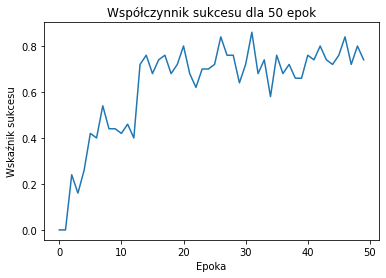

Num of iteration 50 Final success rate of VI: 74.0


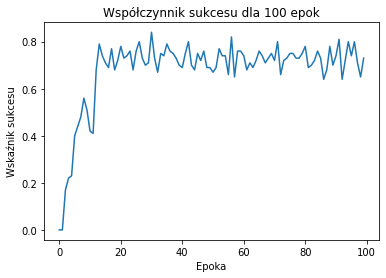

Num of iteration 100 Final success rate of VI: 73.0


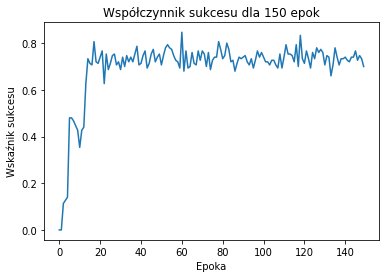

Num of iteration 150 Final success rate of VI: 70.0


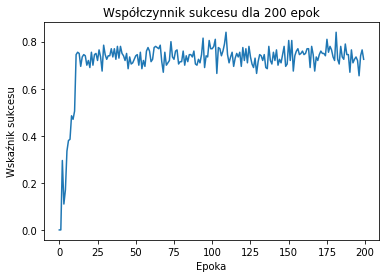

Num of iteration 200 Final success rate of VI: 72.5


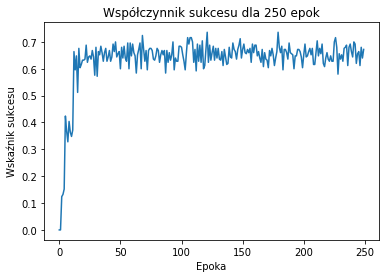

Num of iteration 250 Final success rate of VI: 67.2


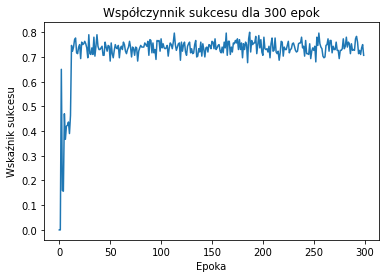

Num of iteration 300 Final success rate of VI: 70.66666666666667


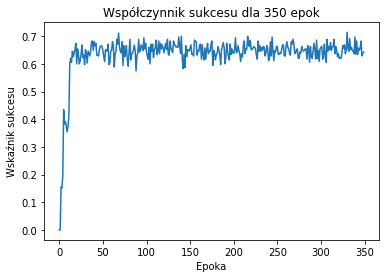

Num of iteration 350 Final success rate of VI: 64.28571428571429


In [17]:
ite = list(range(50,400,50))
for index in range(len(ite)):
    plot(success_rates[index], f"Współczynnik sukcesu dla {ite[index]} epok")
    print(f"Num of iteration {ite[index]} Final success rate of VI: {success_rates[index][-1] * 100}") 

In [25]:
policy, success_rate = trainModel("FrozenLake-v1", 15, 100)

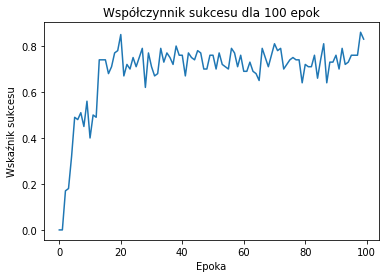

In [26]:
plot(success_rate, f"Współczynnik sukcesu dla 100 epok", save=True)

In [27]:
policy, success_rate = trainModel("FrozenLake-v1", 15, 150)

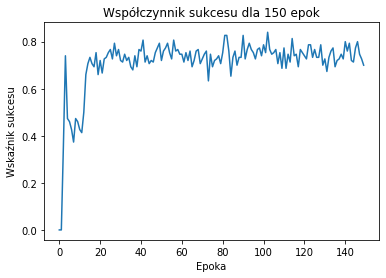

In [28]:
plot(success_rate, f"Współczynnik sukcesu dla 150 epok", save=True)